In [ ]:
import os
print(os.listdir('us_accidents_data'))

['US_Accidents_March23.csv']


In [ ]:
import pandas as pd

# Define the correct path
file_path = 'us_accidents_data/US_Accidents_March23.csv'

# Select only useful columns
use_cols = [
    'ID', 'Severity', 'Start_Time', 'End_Time',
    'Start_Lat', 'Start_Lng',
    'Weather_Condition', 'Visibility(mi)', 'Temperature(F)',
    'Junction', 'Bump', 'Traffic_Signal'
]

# Read only those columns, limited rows for speed (adjust nrows as needed)
df = pd.read_csv(file_path, usecols=use_cols, low_memory=False, nrows=100_000)

# Show first few rows
df.head()


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Temperature(F),Visibility(mi),Weather_Condition,Bump,Junction,Traffic_Signal
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,36.9,10.0,Light Rain,False,False,False
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,37.9,10.0,Light Rain,False,False,False
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,36.0,10.0,Overcast,False,False,True
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,35.1,9.0,Mostly Cloudy,False,False,False
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,36.0,6.0,Mostly Cloudy,False,False,True


In [ ]:
df = pd.read_csv(file_path, usecols=use_cols, low_memory=False)

In [ ]:
df = pd.read_csv(file_path, usecols=use_cols, nrows=100_000)

In [ ]:
!pip install dask
import dask.dataframe as dd

ddf = dd.read_csv(file_path, usecols=use_cols)
ddf.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Temperature(F),Visibility(mi),Weather_Condition,Bump,Junction,Traffic_Signal
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,36.9,10.0,Light Rain,False,False,False
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,37.9,10.0,Light Rain,False,False,False
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,36.0,10.0,Overcast,False,False,True
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,35.1,9.0,Mostly Cloudy,False,False,False
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,36.0,6.0,Mostly Cloudy,False,False,True


In [ ]:
import os
print("Size (MB):", os.path.getsize(file_path) / 1e6)

Size (MB): 3058.183727


In [ ]:
# Drop rows with essential missing values
df = df.dropna(subset=['Start_Lat', 'Start_Lng', 'Start_Time', 'Weather_Condition'])
print("After dropping missing rows:", df.shape)

After dropping missing rows: (98396, 12)


In [ ]:
# Convert Start_Time to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract time-based features
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek  # 0=Monday
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year

<ipython-input-18-6a87c8c6321a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start_Time'] = pd.to_datetime(df['Start_Time'])
<ipython-input-18-6a87c8c6321a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Start_Time'].dt.hour
<ipython-input-18-6a87c8c6321a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

<ipython-input-19-714363be1f6d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='magma')


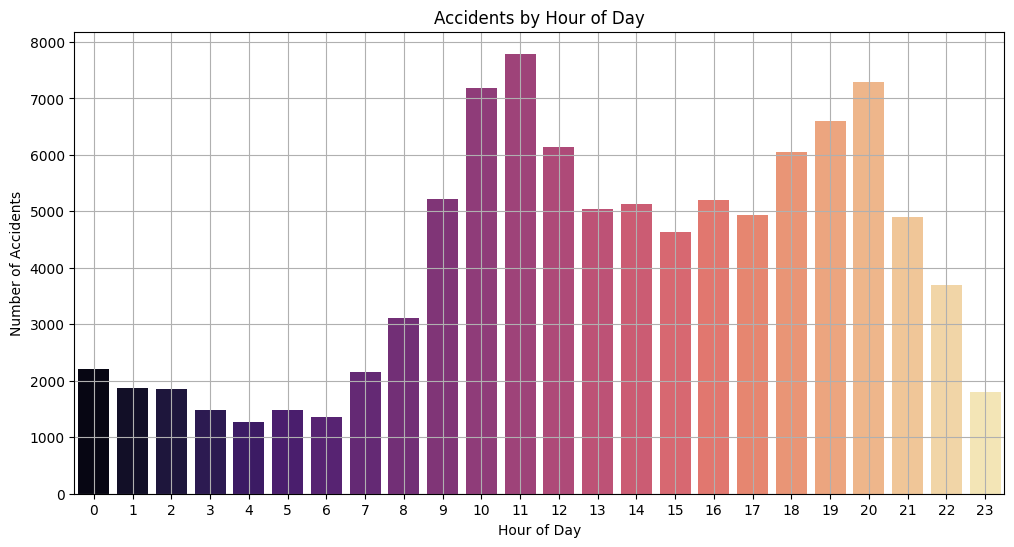

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(x='Hour', data=df, palette='magma')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

<ipython-input-20-6f675fd1a6c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=df, palette='viridis')


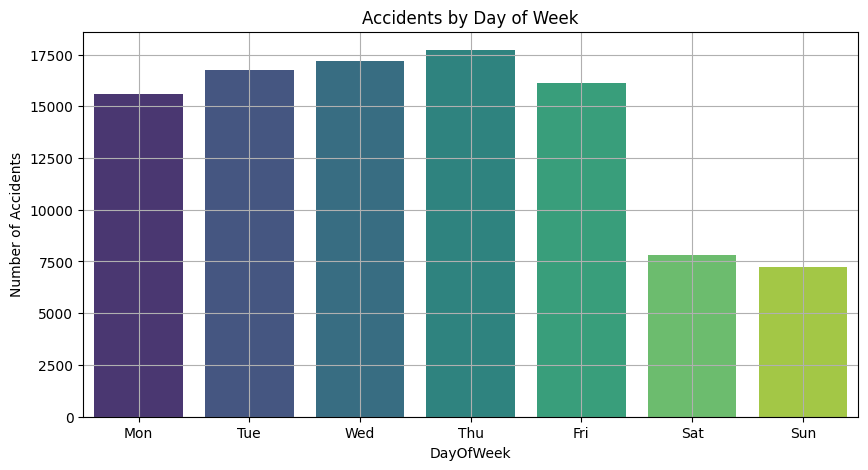

In [ ]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(10,5))
sns.countplot(x='DayOfWeek', data=df, palette='viridis')
plt.xticks(ticks=range(7), labels=days)
plt.title('Accidents by Day of Week')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

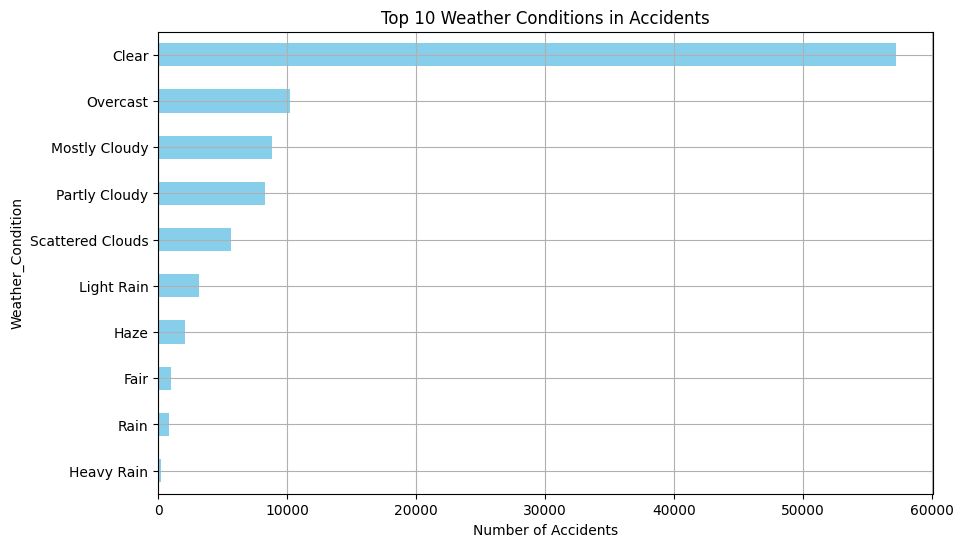

In [ ]:
plt.figure(figsize=(10,6))
df['Weather_Condition'].value_counts().head(10).sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Weather Conditions in Accidents')
plt.xlabel('Number of Accidents')
plt.grid(True)
plt.show()

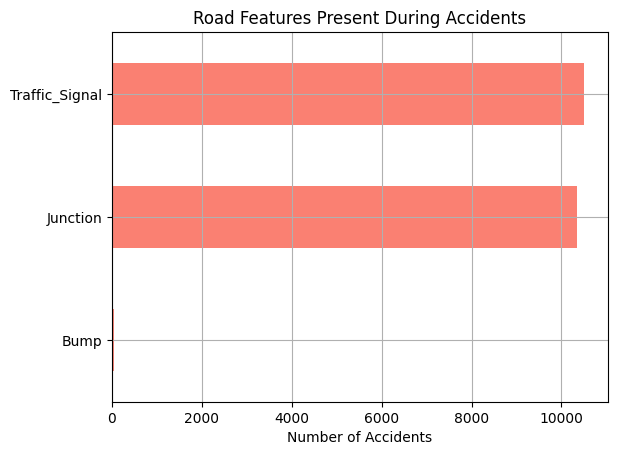

In [ ]:
road_features = ['Bump', 'Junction', 'Traffic_Signal']  # only what's in df
df[road_features].sum().sort_values().plot(kind='barh', color='salmon')
plt.title("Road Features Present During Accidents")
plt.xlabel("Number of Accidents")
plt.grid(True)
plt.show()

In [ ]:
import folium
from folium.plugins import HeatMap

# Sample to improve performance
sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(10000)

# Create map
m = folium.Map(location=[39.5, -98.35], zoom_start=4)  # Center of US
HeatMap(data=sample_df.values.tolist(), radius=8).add_to(m)
m

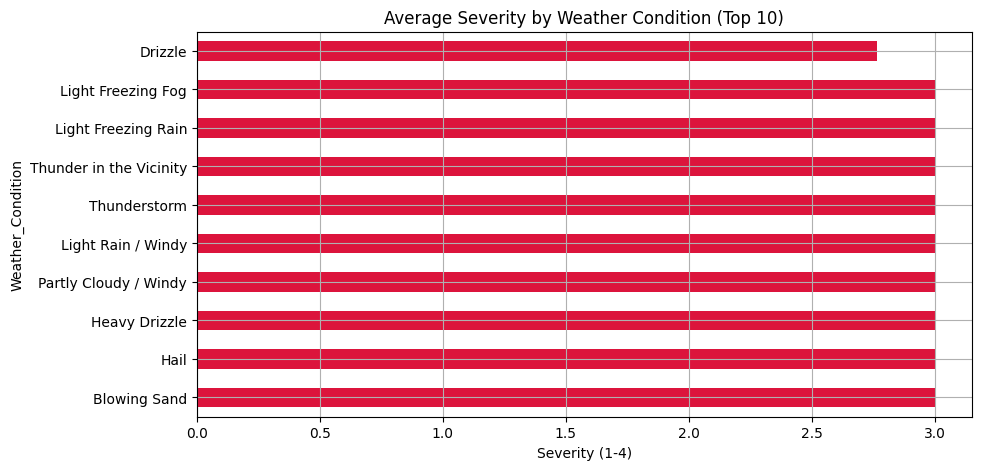

In [ ]:
severity_weather = df.groupby('Weather_Condition')['Severity'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
severity_weather.plot(kind='barh', color='crimson')
plt.title('Average Severity by Weather Condition (Top 10)')
plt.xlabel('Severity (1-4)')
plt.grid(True)
plt.show()

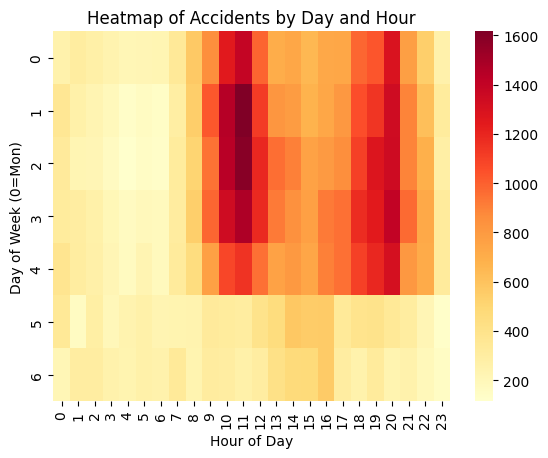

In [ ]:
pivot = df.pivot_table(index='DayOfWeek', columns='Hour', values='ID', aggfunc='count')
sns.heatmap(pivot, cmap='YlOrRd')
plt.title('Heatmap of Accidents by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Mon)')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(5000)
kmeans = KMeans(n_clusters=10, random_state=0).fit(sample_df)

# Plot on Folium map
m = folium.Map(location=[39.5, -98.35], zoom_start=4)
for lat, lng in kmeans.cluster_centers_:
    folium.CircleMarker([lat, lng], radius=10, color='red', fill=True).add_to(m)
m

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

features = ['Hour', 'DayOfWeek', 'Month', 'Bump', 'Junction', 'Traffic_Signal']
X = df[features]
y = df['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = RandomForestClassifier()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.5586910125681764


In [ ]:
# Drop rows with nulls in critical predictive fields
df_ml = df.dropna(subset=['Severity', 'Hour', 'DayOfWeek', 'Month', 'Junction', 'Bump', 'Traffic_Signal', 'Weather_Condition'])

# Optional: Simplify weather to top 5 conditions, group others as 'Other'
top_weather = df_ml['Weather_Condition'].value_counts().nlargest(5).index
df_ml['Weather_Simple'] = df_ml['Weather_Condition'].apply(lambda x: x if x in top_weather else 'Other')

In [ ]:
# One-hot encode Weather_Simple
df_ml = pd.get_dummies(df_ml, columns=['Weather_Simple'], drop_first=True)

# Select final features
features = ['Hour', 'DayOfWeek', 'Month', 'Junction', 'Bump', 'Traffic_Signal'] + \
           [col for col in df_ml.columns if col.startswith('Weather_Simple_')]
X = df_ml[features]
y = df_ml['Severity']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        32
           2       0.59      0.65      0.62     16208
           3       0.51      0.45      0.48     13269
           4       0.00      0.00      0.00        10

    accuracy                           0.56     29519
   macro avg       0.28      0.27      0.27     29519
weighted avg       0.55      0.56      0.55     29519

Confusion Matrix:
 [[    0    27     5     0]
 [    4 10573  5631     0]
 [    1  7342  5925     1]
 [    0     4     6     0]]


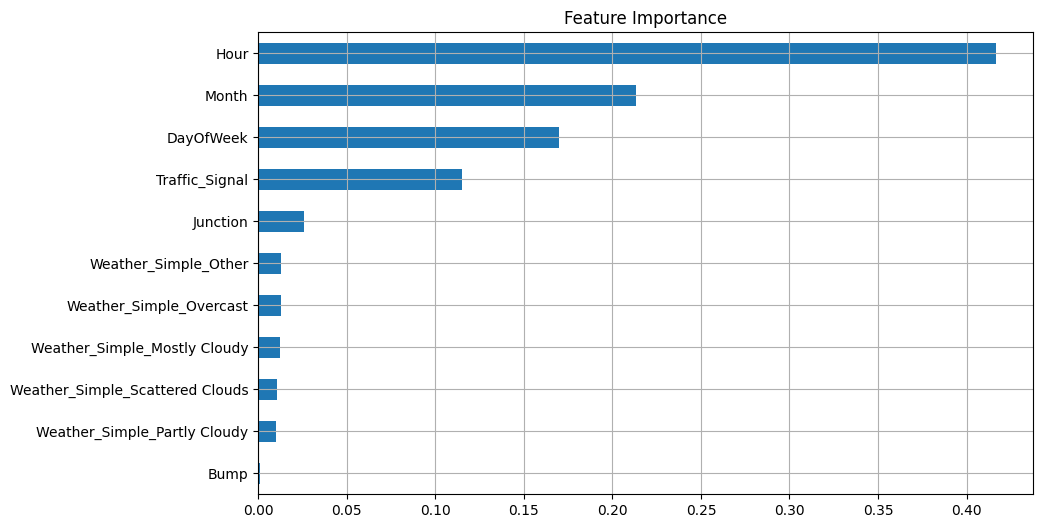

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6), title="Feature Importance")
plt.grid(True)
plt.show()

In [ ]:
!pip install streamlit pyngrok --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle

# Load trained model
model = pickle.load(open("severity_model.pkl", "rb"))

st.title("🚨 Accident Severity Predictor")

st.write("Enter accident conditions to predict the severity (1 to 4)")

# Input sliders
hour = st.slider("Hour of Day", 0, 23, 12)
day = st.selectbox("Day of Week", list(range(7)))  # 0=Mon
month = st.slider("Month", 1, 12, 6)
junction = st.checkbox("Is at Junction?")
bump = st.checkbox("Is there a Bump?")
signal = st.checkbox("Is there a Traffic Signal?")
weather = st.selectbox("Weather Condition", ['Clear', 'Rain', 'Cloudy', 'Snow', 'Fog', 'Other'])

# Encode weather
weather_cols = ['Weather_Simple_Clear', 'Weather_Simple_Cloudy', 'Weather_Simple_Fog', 'Weather_Simple_Rain', 'Weather_Simple_Snow']
weather_vals = [1 if f"Weather_Simple_{weather}" == col else 0 for col in weather_cols]

# Feature vector
features = [[hour, day, month, int(junction), int(bump), int(signal)] + weather_vals]

if st.button("Predict Severity"):
    prediction = model.predict(features)
    st.success(f"Predicted Severity: {prediction[0]}")

Writing app.py


In [ ]:
import pickle
pickle.dump(model, open("severity_model.pkl", "wb"))

In [ ]:
!ngrok config add-authtoken 2y6gKfgzdDJef4ZFzeJhhRKNXj7_hrqrVsHxHjMoUaHbbgEx

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Start Streamlit in the background
!streamlit run app.py &>/content/logs.txt &

# Start ngrok tunnel correctly (port as int)
url = ngrok.connect(8501)

print("Your Streamlit app is live at:", url)

Your Streamlit app is live at: NgrokTunnel: "https://dd8b-35-234-55-143.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
print(df.columns.tolist())

['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Visibility(mi)', 'Weather_Condition', 'Bump', 'Junction', 'Traffic_Signal', 'Hour', 'DayOfWeek', 'Month', 'Year']


In [ ]:
features = [
    'Start_Lat', 'Start_Lng',
    'Temperature(F)', 'Visibility(mi)',
    'Weather_Condition',
    'Bump', 'Junction', 'Traffic_Signal',
    'Hour', 'DayOfWeek', 'Month',
    'Severity'  # target
]

In [ ]:
df_model = df[features].dropna()

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_model = df_model.copy()
label_enc = LabelEncoder()
df_model['Weather_Condition'] = label_enc.fit_transform(df_model['Weather_Condition'])

In [ ]:
# Shift target to start from 0 (XGBoost needs class labels like 0,1,2,...)
df_model['Severity'] = df_model['Severity'] - 1

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_model = df[[
    'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Visibility(mi)',
    'Weather_Condition', 'Bump', 'Junction', 'Traffic_Signal',
    'Hour', 'DayOfWeek', 'Month', 'Severity'
]].dropna()

# Encode categorical column
label_enc = LabelEncoder()
df_model['Weather_Condition'] = label_enc.fit_transform(df_model['Weather_Condition'])

# Shift target to start at 0
df_model['Severity'] = df_model['Severity'] - 1

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

X = df_model.drop('Severity', axis=1)
y = df_model['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.94      0.89      0.91     10767
           2       0.87      0.93      0.90      8695
           3       0.00      0.00      0.00         4

    accuracy                           0.91     19484
   macro avg       0.45      0.46      0.45     19484
weighted avg       0.91      0.91      0.91     19484



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import joblib

joblib.dump(model, 'severity_model.joblib')
joblib.dump(label_enc, 'weather_label_encoder.joblib')

['weather_label_encoder.joblib']

In [ ]:
!pip install streamlit-folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.4/328.4 kB 5.1 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd
import joblib
import folium
from streamlit_folium import st_folium

# Load model and encoder
model = joblib.load('severity_model.joblib')
weather_encoder = joblib.load('weather_label_encoder.joblib')

st.title("🚦 Real-Time Accident Severity Risk Predictor")

# User input for location, time, weather
lat = st.number_input("Latitude", min_value=24.0, max_value=50.0, value=37.77)
lng = st.number_input("Longitude", min_value=-125.0, max_value=-66.0, value=-122.42)
temperature = st.number_input("Temperature (F)", min_value=-10, max_value=120, value=60)
visibility = st.number_input("Visibility (mi)", min_value=0, max_value=20, value=10)

weather_conditions = list(weather_encoder.classes_)
weather = st.selectbox("Weather Condition", weather_conditions)

bump = st.checkbox("Bump nearby")
junction = st.checkbox("Junction nearby")
traffic_signal = st.checkbox("Traffic Signal nearby")

hour = st.slider("Hour of Day", 0, 23, 12)
day_of_week = st.slider("Day of Week (0=Monday)", 0, 6, 2)
month = st.slider("Month", 1, 12, 6)

if st.button("Predict Accident Severity Risk"):
    # Prepare input dataframe for prediction
    input_df = pd.DataFrame({
        'Start_Lat': [lat],
        'Start_Lng': [lng],
        'Temperature(F)': [temperature],
        'Visibility(mi)': [visibility],
        'Weather_Condition': weather_encoder.transform([weather]),
        'Bump': [int(bump)],
        'Junction': [int(junction)],
        'Traffic_Signal': [int(traffic_signal)],
        'Hour': [hour],
        'DayOfWeek': [day_of_week],
        'Month': [month]
    })

    pred = model.predict(input_df)[0]
    severity = pred + 1  # shift back to original label 1-4

    st.success(f"Predicted Accident Severity Level: {severity}")

    # Show on map
    m = folium.Map(location=[lat, lng], zoom_start=13)
    folium.Marker([lat, lng], popup=f"Severity Risk: {severity}", icon=folium.Icon(color='red')).add_to(m)
    st_folium(m, width=700)

2025-06-05 22:11:24.924 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 22:11:24.960 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 22:11:25.230 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-05 22:11:25.237 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 22:11:25.241 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 22:11:25.244 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 22:11:25.245 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [ ]:
pip install streamlit folium streamlit-folium xgboost scikit-learn joblib

In [ ]:
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8504
  Network URL: http://172.28.0.12:8504
  External URL: http://35.234.55.143:8504

https://ngrok.com/


In [62]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [65]:
!ngrok authtoken 2y6gKfgzdDJef4ZFzeJhhRKNXj7_hrqrVsHxHjMoUaHbbgEx

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [68]:
from pyngrok import ngrok

public_url = ngrok.connect(addr=8501)
print(f"Streamlit app URL: {public_url}")

Streamlit app URL: NgrokTunnel: "https://14d8-35-234-55-143.ngrok-free.app" -> "http://localhost:8501"


In [2]:
import pandas as pd

# Load data
file_path = 'us_accidents_data/US_Accidents_March23.csv'
use_cols = [
    'ID', 'Severity', 'Start_Time', 'End_Time',
    'Start_Lat', 'Start_Lng',
    'Weather_Condition', 'Visibility(mi)', 'Temperature(F)',
    'Junction', 'Bump', 'Traffic_Signal'
]
df = pd.read_csv(file_path, usecols=use_cols, low_memory=False, nrows=100000)

# Convert Start_Time to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract features
df['Hour'] = df['Start_Time'].dt.hour
df['Month'] = df['Start_Time'].dt.month
df['Weekday'] = df['Start_Time'].dt.weekday

# Handle missing values
df = df.dropna(subset=['Weather_Condition', 'Temperature(F)', 'Visibility(mi)'])

# Encode Weather_Condition
df['Weather_Condition'] = df['Weather_Condition'].astype('category').cat.codes

# Final feature set
features = [
    'Temperature(F)', 'Visibility(mi)', 'Weather_Condition',
    'Junction', 'Bump', 'Traffic_Signal', 'Hour', 'Month', 'Weekday'
]
X = df[features]
y = df['Severity']

<ipython-input-2-41ee9b5ef1db>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weather_Condition'] = df['Weather_Condition'].astype('category').cat.codes


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        18
           2       0.63      0.64      0.63     10767
           3       0.54      0.53      0.54      8695
           4       0.00      0.00      0.00         4

    accuracy                           0.59     19484
   macro avg       0.29      0.29      0.29     19484
weighted avg       0.59      0.59      0.59     19484



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [4]:
# Save this in streamlit_app.py or a new cell in Colab
import streamlit as st
import folium
from streamlit_folium import st_folium
from folium.plugins import HeatMap
import numpy as np

st.title("US Accident Severity Predictor")

# Input form
st.sidebar.header("User Input Features")
temp = st.sidebar.slider('Temperature (F)', 0, 120, 60)
vis = st.sidebar.slider('Visibility (mi)', 0, 20, 10)
weather = st.sidebar.slider('Weather Condition Code', 0, 80, 10)
junction = st.sidebar.selectbox('Near Junction?', [0, 1])
bump = st.sidebar.selectbox('Has Bump?', [0, 1])
signal = st.sidebar.selectbox('Traffic Signal Present?', [0, 1])
hour = st.sidebar.slider('Hour of Day', 0, 23, 8)
month = st.sidebar.slider('Month', 1, 12, 6)
weekday = st.sidebar.slider('Weekday (0=Mon)', 0, 6, 2)

user_input = [[temp, vis, weather, junction, bump, signal, hour, month, weekday]]

if st.button('Predict Severity'):
    pred = model.predict(user_input)
    st.success(f"Predicted Severity: {pred[0]}")

2025-06-05 23:03:51.648 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 23:03:51.654 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 23:03:51.808 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-05 23:03:51.810 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 23:03:51.813 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 23:03:51.814 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 23:03:51.816 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [5]:
# Use subset for performance
sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(10000)

# Heatmap
m1 = folium.Map(location=[39.5, -98.35], zoom_start=4)
HeatMap(data=sample_df.values.tolist(), radius=8).add_to(m1)
st.subheader("Heatmap of Accidents")
st_folium(m1, width=700)

# KMeans Clusters
from sklearn.cluster import KMeans
sample_cluster = df[['Start_Lat', 'Start_Lng']].dropna().sample(5000)
kmeans = KMeans(n_clusters=10, random_state=0).fit(sample_cluster)

m2 = folium.Map(location=[39.5, -98.35], zoom_start=4)
for lat, lng in kmeans.cluster_centers_:
    folium.CircleMarker([lat, lng], radius=10, color='red', fill=True).add_to(m2)
st.subheader("Clustered Accident Centers")
st_folium(m2, width=700)

2025-06-05 23:04:05.954 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 23:04:05.955 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 23:04:06.091 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 23:04:06.092 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 23:04:06.094 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 23:04:06.095 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 23:04:06.458 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 23:04:06.462 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

{'last_clicked': None,
 'last_object_clicked': None,
 'last_object_clicked_tooltip': None,
 'last_object_clicked_popup': None,
 'all_drawings': None,
 'last_active_drawing': None,
 'bounds': {'_southWest': {'lat': 32.87380723237598,
   'lng': -122.45873567088607},
  '_northEast': {'lat': 40.040969363636364, 'lng': -83.54267890909091}},
 'zoom': 4,
 'last_circle_radius': None,
 'last_circle_polygon': None,
 'selected_layers': None}